In [ ]:
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 44.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/train.csv')

In [ ]:
data_train.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,0,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
1,1,"第一商品金地金参考価格(1kg税込) 8:45現在 販売 6,578,000円 買取 6,5...",0.000000,0.000000,Neutral
2,2,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
3,3,🇺🇸 tonights sales! 🇺🇸 rare collectibles! ebay ...,0.366667,0.158333,Positive
4,4,gbpusd gbpchf us100 nasdac gbpnzd gbpcad us30 ...,0.000000,0.000000,Neutral


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/ColabData/twitter_2019_2020_pandemi/test.csv')

In [ ]:
data_test.head()

,Unnamed: 0,tweet,Subjectivity,Polarity,Analysis
0,80000,gbpusd dax nas100 sp500 us30 dow dow30 ger30 x...,0.0,0.0,Neutral
1,80001,babanın oğlu kemal güçlü.. altın ons gram dola...,0.0,0.0,Neutral
2,80002,double qm - xauusd chart,0.0,0.0,Neutral
3,80003,xauusd 4h ⬇️⬇️,0.0,0.0,Neutral
4,80004,btc dax nas100 sp500 us30 dow dow30 ger30 xauu...,0.0,0.0,Neutral


In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train,
                 text_column = 'tweet',
                 label_columns = 'Analysis',
                 val_df = data_test,
                 maxlen = 400,
                 ngram_range=2,
                 preprocess_mode = 'bert')

['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      0.0       1.0
1       0.0      1.0       0.0
2       0.0      0.0       1.0
3       0.0      0.0       1.0
4       0.0      1.0       0.0
['Negative', 'Neutral', 'Positive']
   Negative  Neutral  Positive
0       0.0      1.0       0.0
1       0.0      1.0       0.0
2       0.0      1.0       0.0
3       0.0      1.0       0.0
4       0.0      1.0       0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(80000, 400)

In [ ]:
model = text.text_classifier(name='bert',
                            train_data = (X_train, y_train),
                            preproc = preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [ ]:
# Get learning rate.
learner = ktrain.get_learner(model = model,
                            train_data = (X_train, y_train),
                            val_data = (X_test, y_test),
                            batch_size = 6)

In [ ]:
# get optimal learning rate.
#learner.lr_find(start_lr=1e-07, max_epochs=10)
#learner.lr_plot()

In [13]:
history = learner.fit_onecycle(lr = 2e-5, epochs = 3) #2e-5, 1e-4




begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
13334/13334 [==============================] - 8643s 647ms/step - loss: 0.0680 - accuracy: 0.9776 - val_loss: 0.3474 - val_accuracy: 0.8700
Epoch 2/3
13334/13334 [==============================] - 8619s 646ms/step - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.3237 - val_accuracy: 0.9432
Epoch 3/3
13334/13334 [==============================] - 8620s 646ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.4473 - val_accuracy: 0.9434


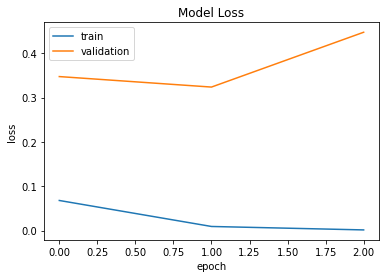

In [14]:
learner.plot('loss')

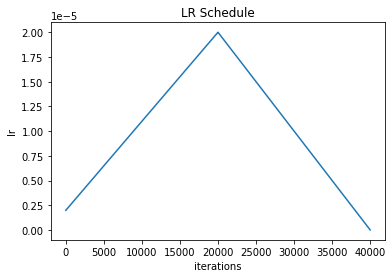

In [15]:
learner.plot('lr')

In [16]:
learner.validate()

470/470 [==============================] - 498s 1s/step
              precision    recall  f1-score   support

           0       0.56      0.65      0.60       477
           1       0.98      0.96      0.97     10618
           2       0.91      0.94      0.93      3918

    accuracy                           0.94     15013
   macro avg       0.82      0.85      0.83     15013
weighted avg       0.95      0.94      0.94     15013



array([[  309,    37,   131],
       [  243, 10159,   216],
       [    0,   222,  3696]])